In [1]:
## Introduction
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, 
rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a 
particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around 
the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to 
their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated 
by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, 
the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing 
system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of 
important events in the city could be detected via monitoring these data.

## Attribute Information
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Import Dataset and libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

day = pd.read_csv("E:\\projects\\Bike-sharing rentals\\day.csv")
hour = pd.read_csv("E:\\projects\\Bike-sharing rentals\\hour.csv")

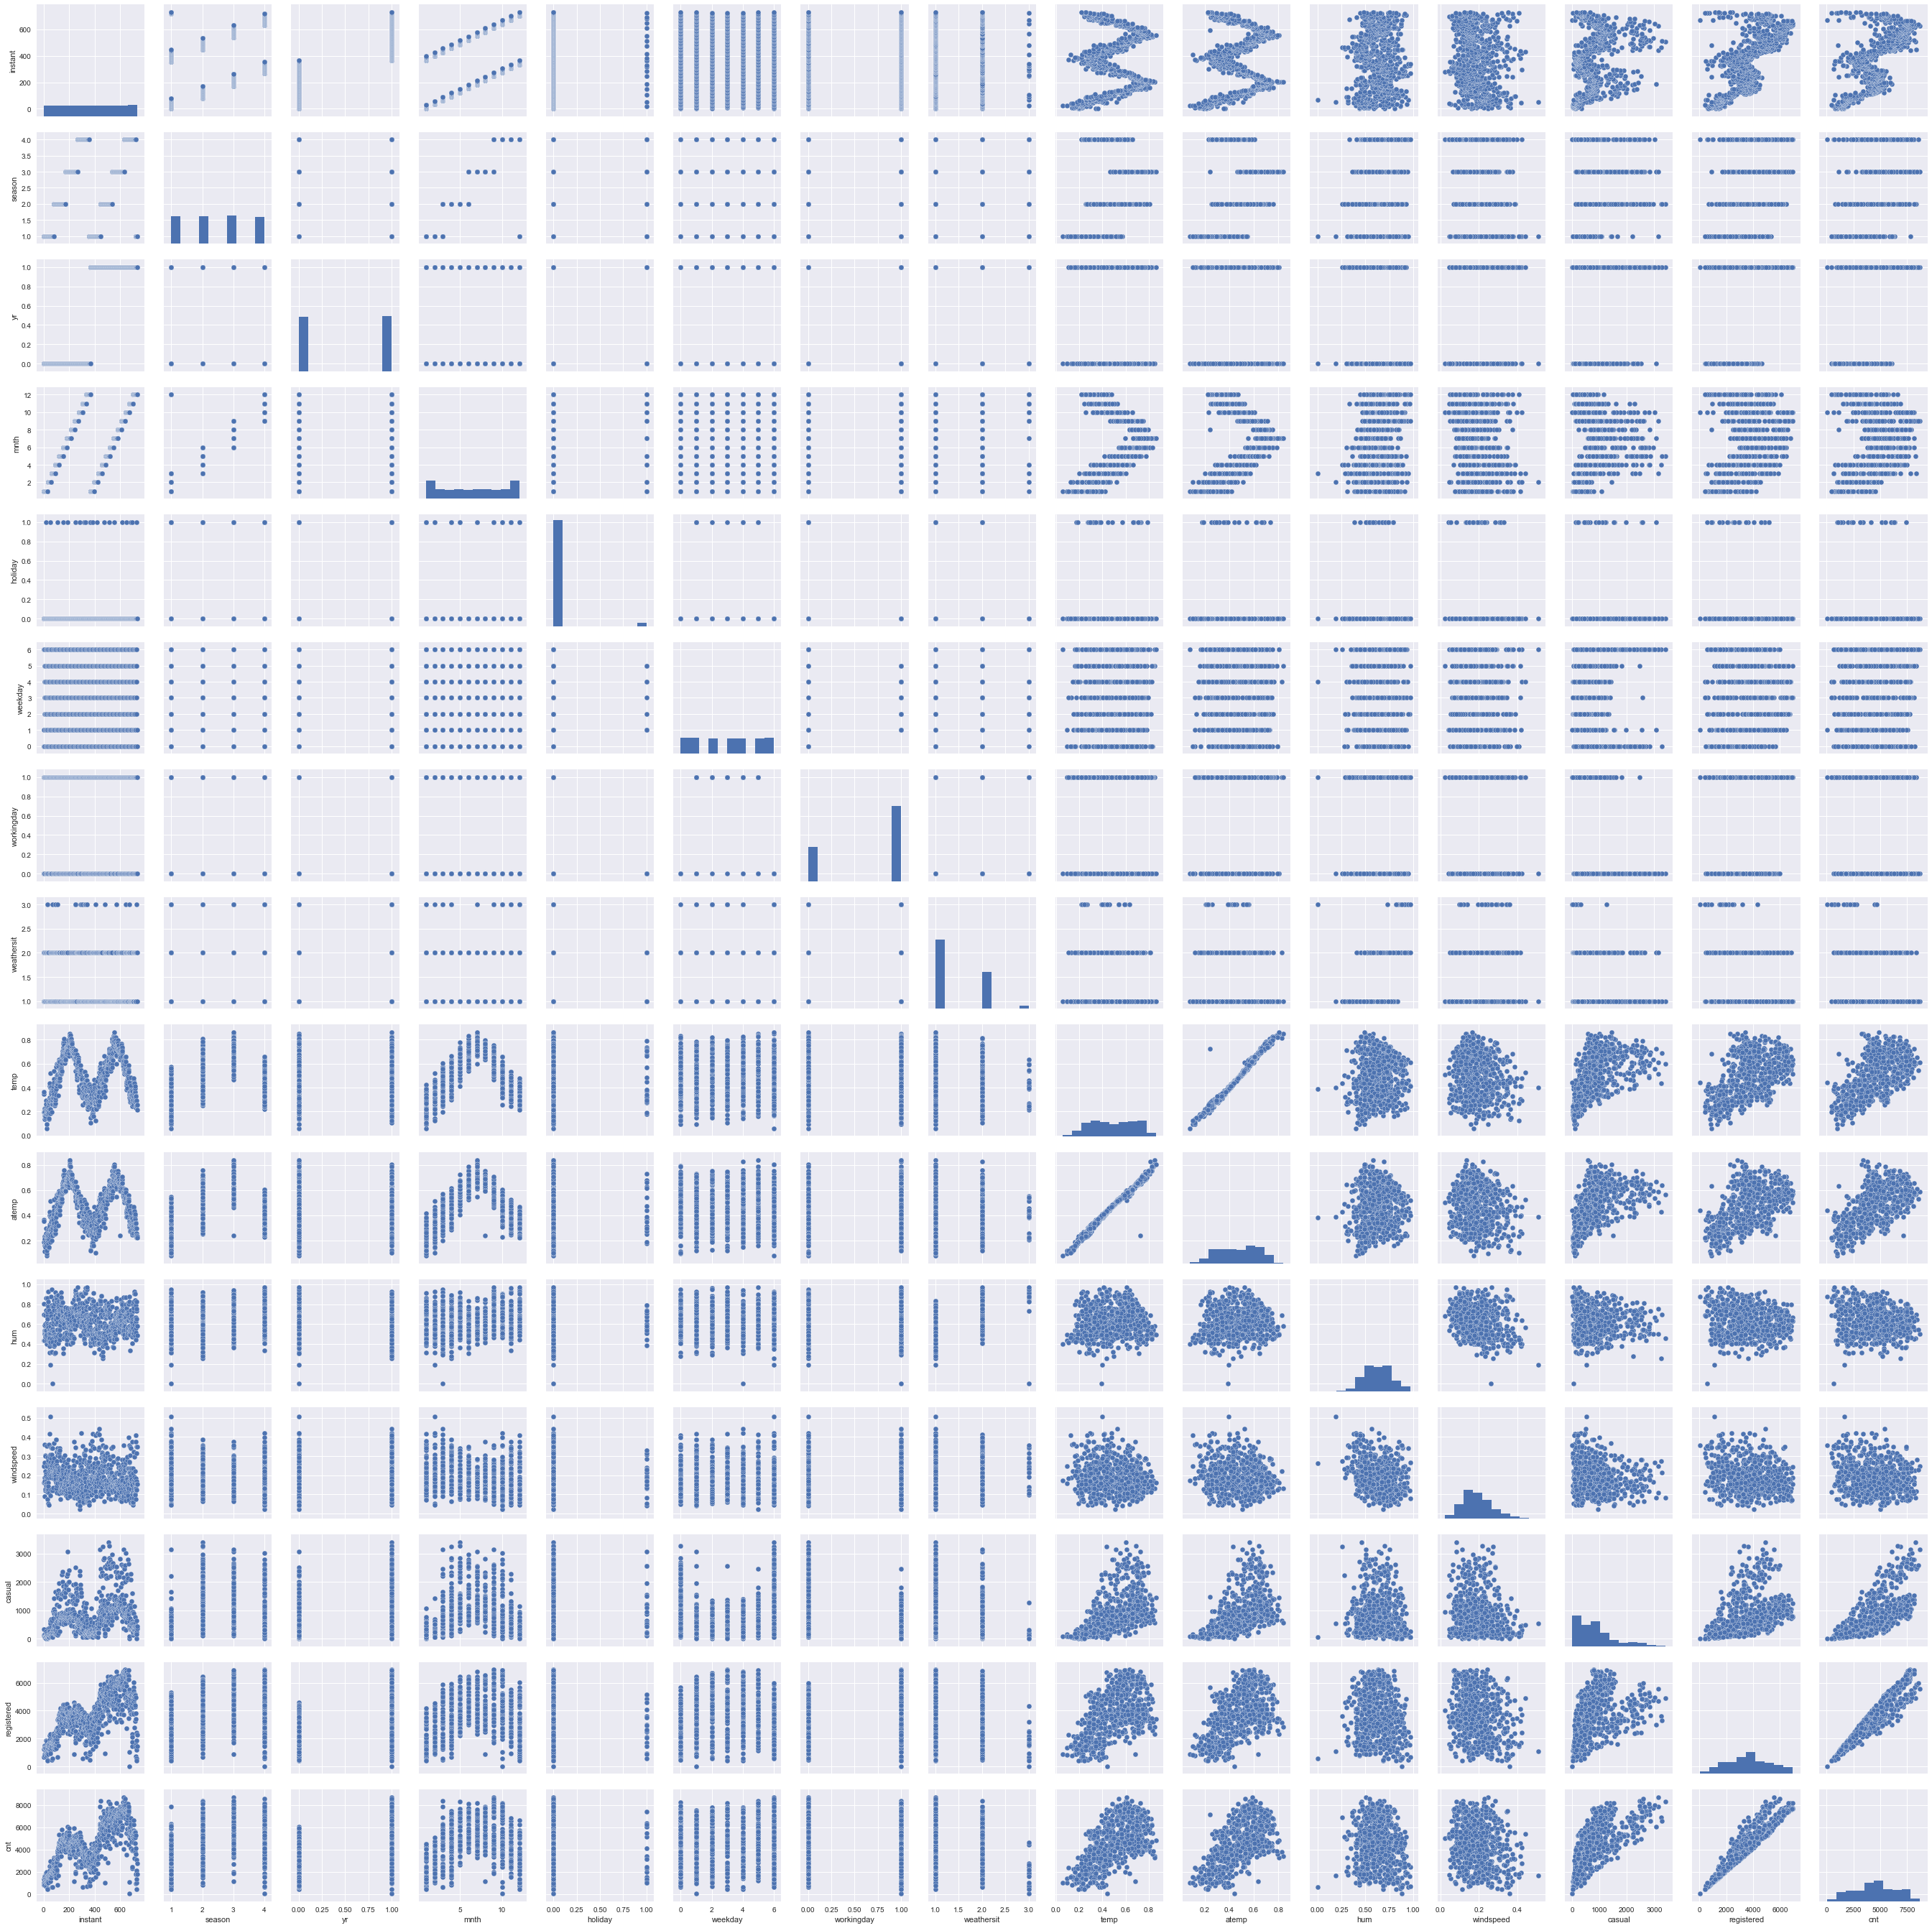

In [2]:
## Visualization
# Pairplot
import seaborn as sns
sns.pairplot(day)
plt.show()

The pairplot shows the relation between each features. We see that there is a strong correlation between temp and a temp, 
good correlation between temp and cnt. So The no.of bikes rented is dependent on temperature.


0.334314856399
0.991701553229
-0.248489098644
0.126962939027
-0.157944120412


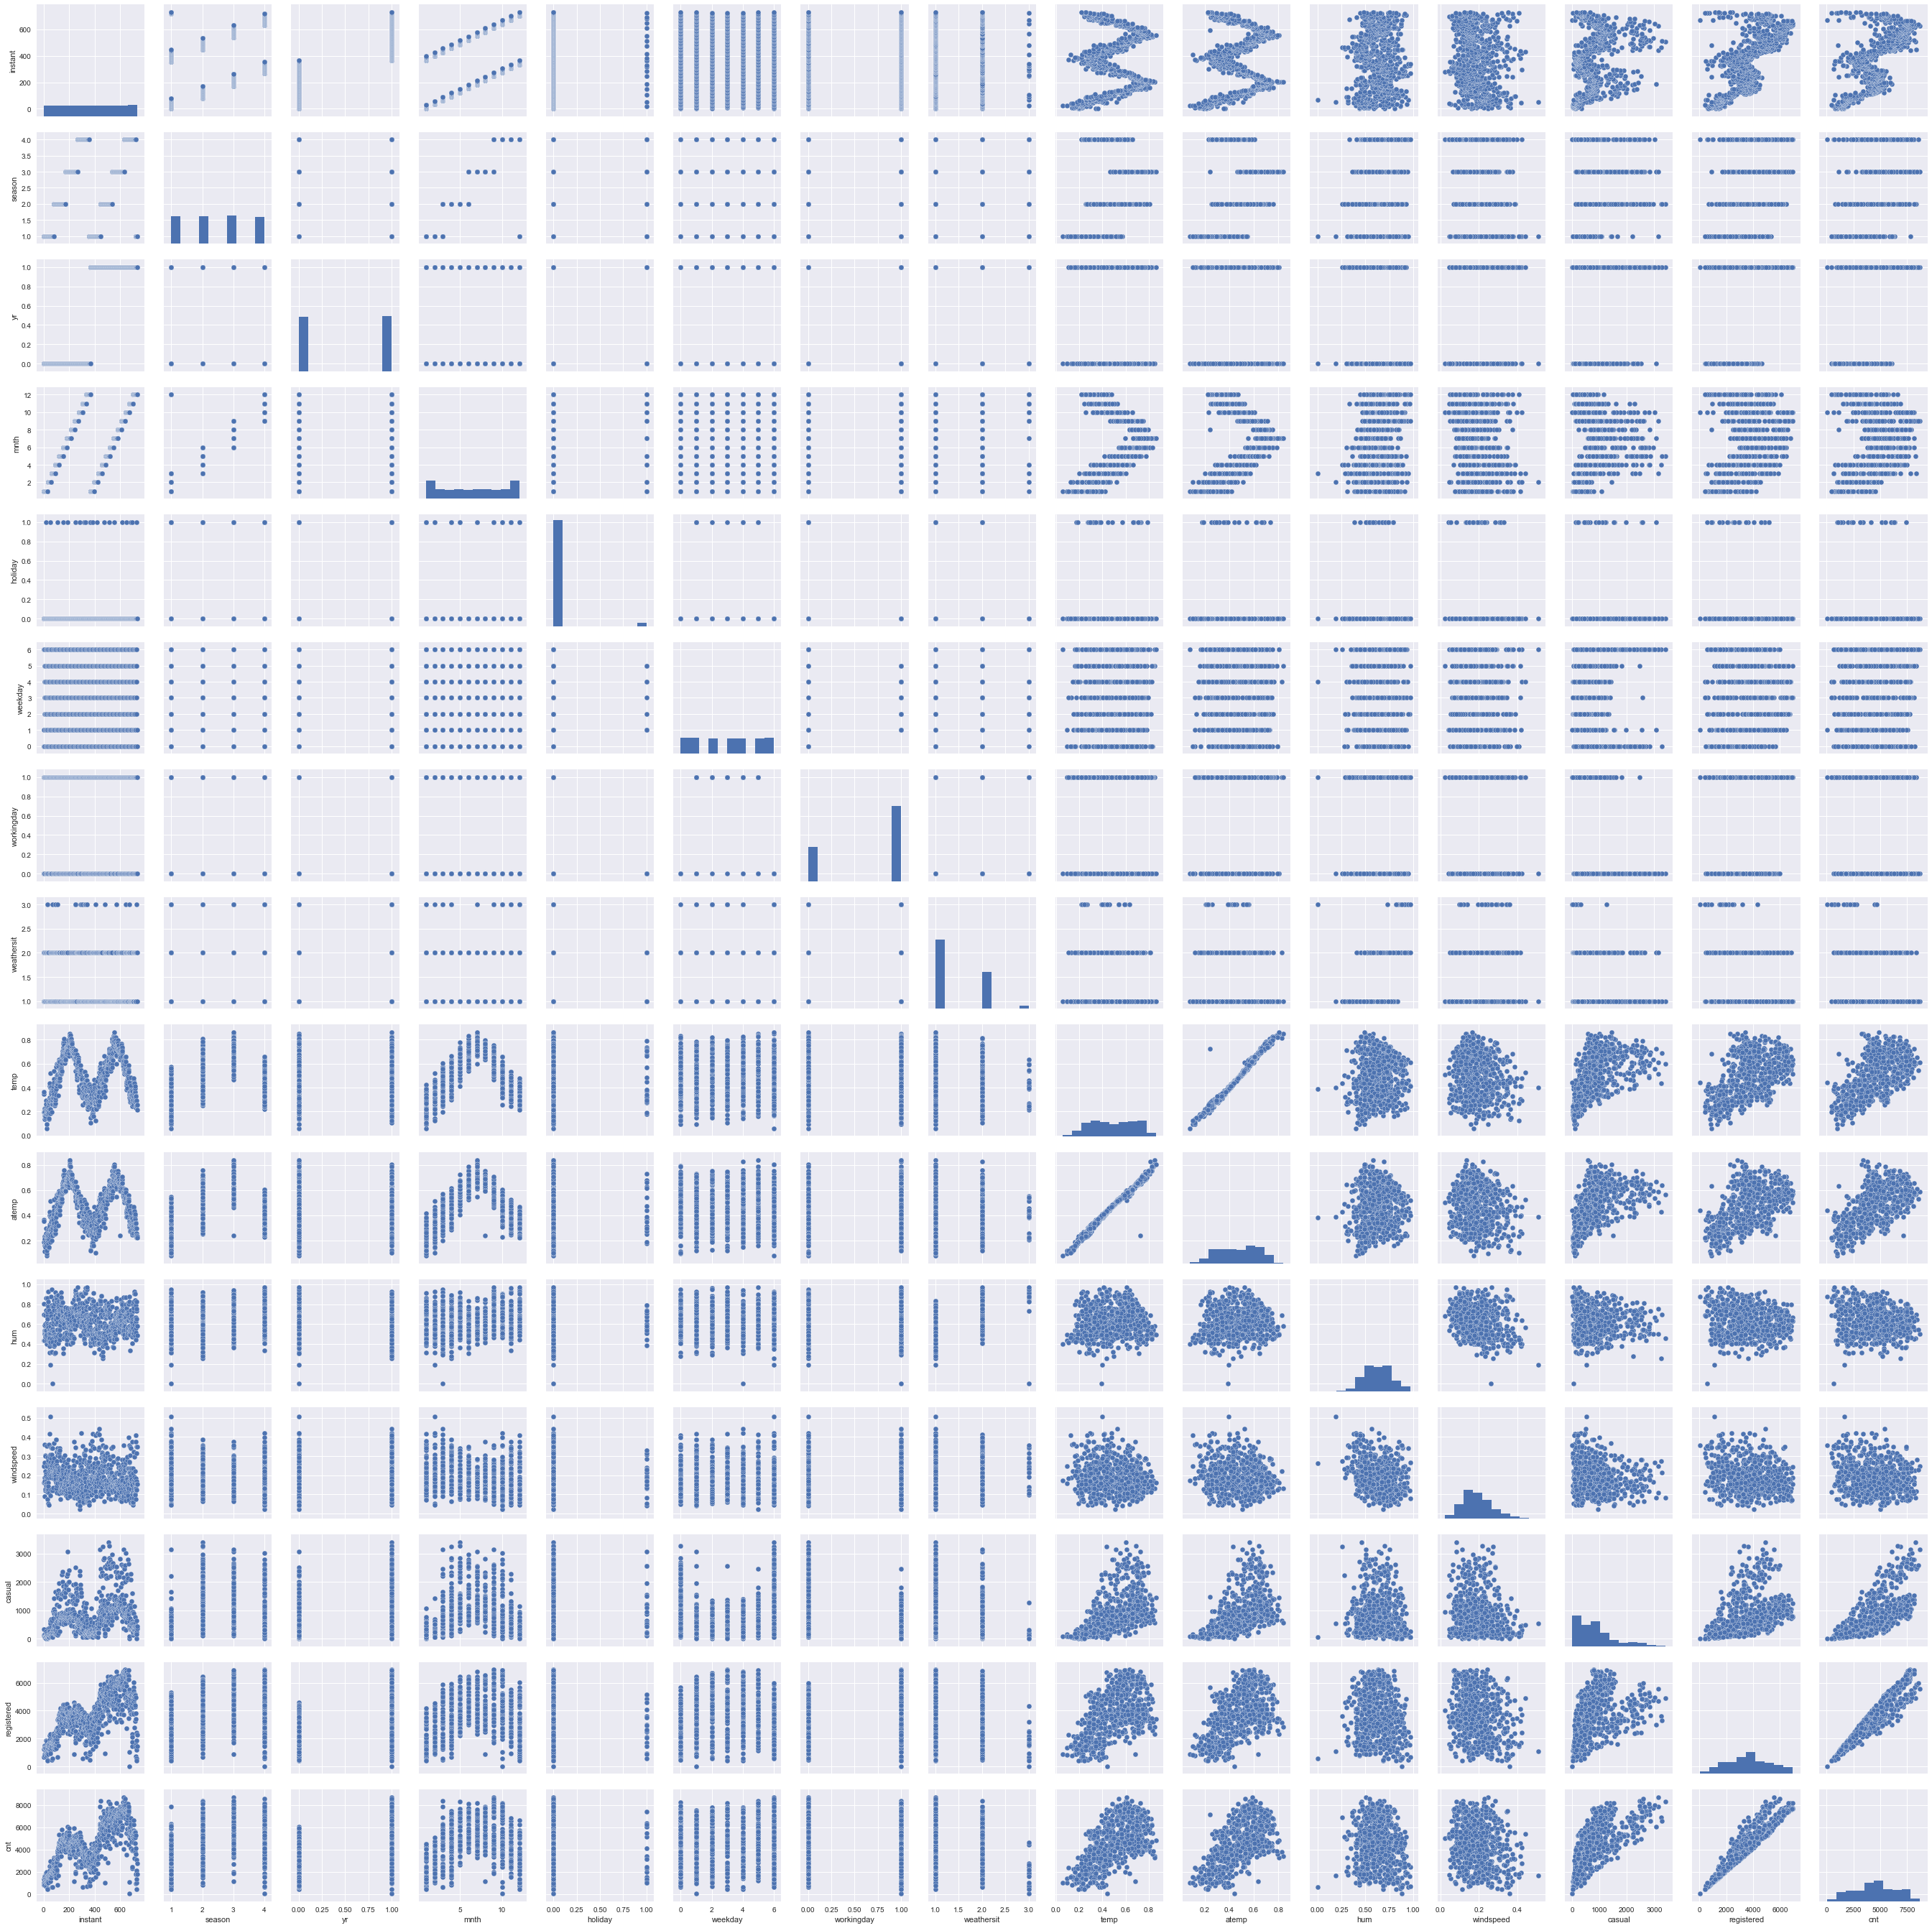

In [4]:
## Correlation
print(day['season'].corr(day['temp']))
print(day['temp'].corr(day['atemp']))
day['temp'].corr(day['cnt'])
print(day['hum'].corr(day['windspeed']))
print(day['temp'].corr(day['hum']))
print(day['temp'].corr(day['windspeed']))

The correlation for atemp and temp are higher as each of them represents the similar values. 

In [11]:
## Calculating Skewness
X = day.iloc[:,2:13].values
y = day.iloc[:,15].values
from scipy import stats
Skewness = stats.skew(X)
print(pd.DataFrame(Skewness,day.iloc[:,2:13].columns.values))

The Skewness tells that all the features follow symmetric distribution

                   0
season     -0.000383
yr         -0.002736
mnth       -0.008132
holiday     5.642615
weekday     0.002736
workingday -0.791519
weathersit  0.955420
temp       -0.054409
atemp      -0.130819
hum        -0.069640
windspeed   0.675955


In [5]:
## Splitting the dataset using cross validation
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

C:\Users\Raghavendran\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
## Analyze model using Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

lm.coef_
lm.intercept_

y_pred = lm.predict(X_test)

The Linear Regression method follow Ordinary Least Squares Regression and predicts the test set

In [7]:
## Metrics to calculate r2 and mean squared error
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)
mean_squared_error(y_test,y_pred)

## Oridnary least Squared Regression
import statsmodels.formula.api as sm
model = sm.ols(formula='cnt ~ season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed',data = day)
fitted = model.fit()
fitted.summary()

The Ordinary Least Squares Regression method is used to compute the mean squared error i.e the average of sum of squared differences 
between actual and predicted values. The high t-statistic value represents low Standard Error. The P-value of less than 0.05 tells
that those predictors are significant w.r to No. of Bike rentals. Here, Season, year, month, holiday, weekday, average temp, weathersit
hum and windspeed are significant predictors to no. of bikes rented.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Sat, 14 Oct 2017   Prob (F-statistic):          7.80e-243
Time:                        23:27:01   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1469.0031    240.218      6.115      0.000       997.390  1940.616
season       509.7752     54.757      9.310      0.000       402.272   617.278
yr          2040.7034     65.185     31.306      0.000      1912.727  2168.680
mnth         -38.9796     17.079     -2.282      0.023       -72.510    -5.449
holiday     -518.9919    201.040     -2.582      0.010      -913.688  -124.296
weekday       69.0622     16.299      4.237      0.000        37.063   101.061
workingday   120.3570     72.007      1.671      0.095       -21.013   261.727
weathersit  -610.9870     78.363     -7.797      0.000      -764.835  -457.139
temp        2028.9161   1403.671      1.445      0.149      -726.867  4784.699
atemp       3573.2743   1589.389      2.248      0.025       452.877  6693.671
hum        -1018.8616    313.995     -3.245      0.001     -1635.318  -402.405
windspeed  -2557.5691    456.278     -5.605      0.000     -3453.365 -1661.774
==============================================================================
Omnibus:                       88.811   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.069
Skew:                          -0.717   Prob(JB):                     7.92e-40
Kurtosis:                       4.964   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""